In [1]:
%run ../init.ipynb

In [2]:
%cd ../../toy/

/home/vadmas/dev/projects/active/qstuff/qpaths_uai_2021/toy


In [3]:
import scipy

In [4]:
from src.paths import qpath
from src.ais import Student1D, student_moment_average, moment_average


In [5]:
def plot_ridge(data, left=-20, right=20, subsample=25000):
    # truncate samples outside of range, then downsample so each dist
    # has the same number of total samples
    data = (data
         .query("@left < x < @right")
         .groupby(['q','beta'])
         .sample(subsample))
    
    
    data['label'] = data.beta.apply(lambda x: r"$\beta=${:.02}".format(x))
    pal = sns.cubehelix_palette(11,
                                rot=-.25,
                                light=.7)

    g = sns.FacetGrid(data, 
                      row="label", 
                      hue="label", 
                      sharey='row',
                      col='q',
                      aspect=15,
                      height=.5,
                      palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot,
          "x",
          bw_adjust=.5,
#           clip=(left, right),
          fill=True, 
          alpha=1,
          linewidth=1.5)

    g.map(sns.kdeplot,
          "x",
#           clip=(left, right),
          color="w",
          lw=2,
          bw_adjust=.5)
    
    g.map(plt.axhline, y=0, lw=2, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)


    g.map(label, "x")

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-.10)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    cols = [r"$q = {:.04}$".format(float(q)) for q in q_vec]

    for ax, col in zip(g.axes[0], cols):
        ax.set_title(col, fontsize=18)
    
    g.despine(bottom=True, left=True)
    return g


In [6]:
def run_student_moment_average(beta, q):
    proposal = Student1D(q=q, mean=-4.0, variance=3)
    target   = Student1D(q=q, mean=4.0 , variance=1)

    dist = student_moment_average(proposal, target, beta)

    samples = dist.sample(n_samples)
    df = pd.Series(samples).to_frame()
    df['beta'] = beta
    df['q'] =  q
    return df.rename_column(0,'x')


n_samples = 500_000
q_vec = [2]
beta_vec = np.linspace(0, 1, 11)
df = pd.concat([run_student_moment_average(b, q) for b in beta_vec for q in q_vec])

/home/vadmas/miniconda/envs/ml3_lite/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


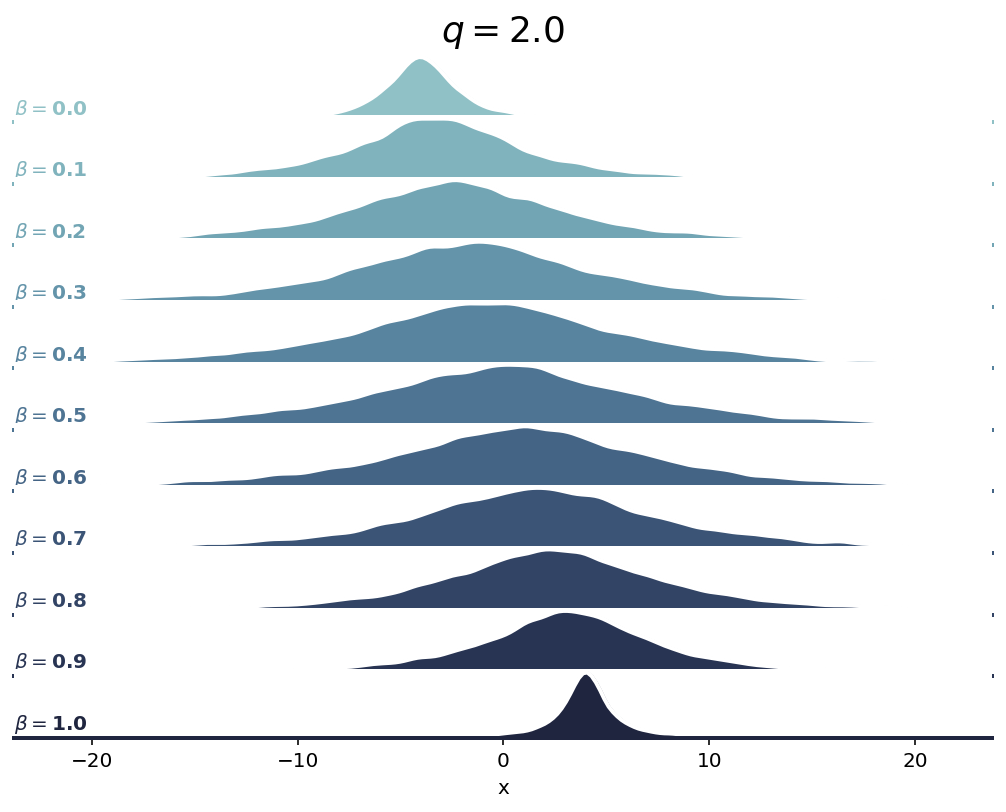

In [7]:
plot_ridge(df)